In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

/Users/vaibhav.singh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("SimpleLR.csv")
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## First regression
* $\hat{y}$ = $b_{0}$ + $b_{1}$$x_{1}$

In [4]:
y = data['GPA']
x1 = data['SAT']

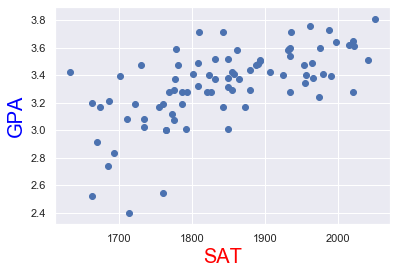

In [5]:
plt.scatter(x1,y)
plt.xlabel("SAT", fontsize=20, color="red")
plt.ylabel("GPA", fontsize=20, color="blue")
plt.show()

* Note above that the higher the SAT of the student, the higher is the GPA
* Now $x_{1}$ and $\hat{y}$ are in place but the constant isn't
* In this case the constant $x_{0}$ seems to be = 1
* statsmodel has a function called `add_constant` for this purpose


In [6]:
x = sm.add_constant(x1)
x.head(2)

,const,SAT
0,1.0,1714
1,1.0,1664


### OLS
ordinary least squares regression - `sm.OLS(y,x)`

In [7]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           7.20e-11
Time:                        00:24:01   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

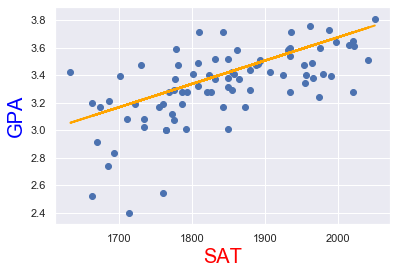

In [8]:
plt.scatter(x1,y)
yhat = 0.0017 * x1 + 0.2750
fig = plt.plot(x1,yhat,lw=2,c="orange", label="Regression Line")
plt.xlabel("SAT", fontsize=20, color="red")
plt.ylabel("GPA", fontsize=20, color="blue")
plt.show()